## Forecasting based on Arima and SARIMAX model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('Airlines+Data.csv')
df.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [3]:
# Length of the dataset
len(df)

96

In [4]:
# create a daterange object starting from january 1995 forthe next 96 months
date =pd.date_range(start='1995-01-01', periods=96,freq='MS')
date

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [5]:
df['Month'] = date
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
# set the Month column as the index
df.set_index('Month', inplace=True) # df = df.set_index('Month')
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [7]:
df.isnull().sum()

Passengers    0
dtype: int64

In [8]:
df.dtypes

Passengers    int64
dtype: object

In [9]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:xlabel='Month'>

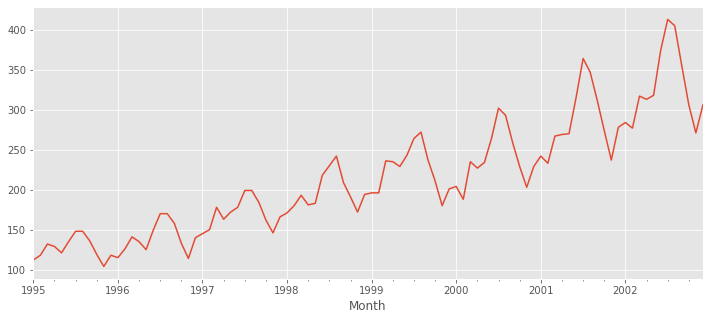

In [10]:
# visualize the data 
df['Passengers'].plot(figsize=(12,5))

In [11]:
len(df)

96

In [12]:
# split into train and test data with the last 10 years as test data
train = df.iloc[:len(df)-10]
test = df.iloc[len(df)-10:]

In [13]:
# check the shape of train and test data
train.shape, test.shape

((86, 1), (10, 1))

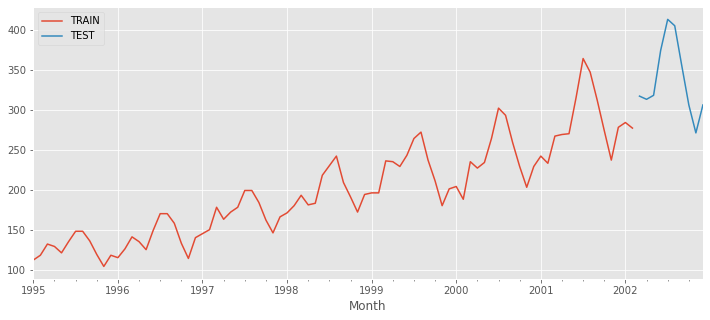

In [14]:
# plot the train and test data in different colors and labels
train['Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test['Passengers'].plot(legend=True, label='TEST', figsize=(12,5));

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

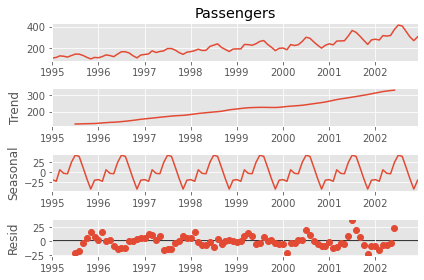

In [16]:
ts_add = seasonal_decompose(df['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

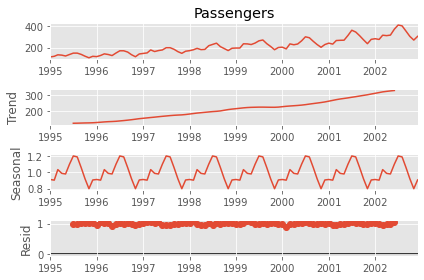

In [17]:
ts_mult=seasonal_decompose(df['Passengers'],model='multiplicative')
fig=ts_mult.plot()
plt.show()

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots

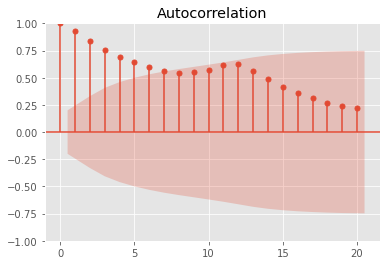

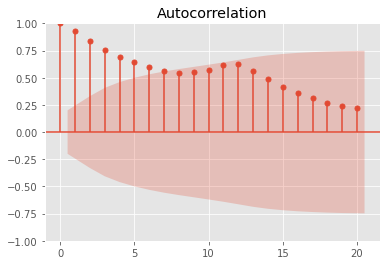

In [19]:
tsa_plots.plot_acf(df['Passengers'])

In [20]:
# arima model parameters tuning with auto_arima
from pmdarima import auto_arima

In [21]:
# implement auto_arima to find best parameter in range of 0 to 3 for p & q and d=1
auto_arima_no_seasonal = auto_arima(train['Passengers'], 
                                    start_p=0, start_q=0, 
                                    max_p=3, max_q=3, 
                                    d=1, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=763.249, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=759.915, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=761.709, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=758.379, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=759.543, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=740.215, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=760.387, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(2,1,2)(0,0,0)[1] intercept
Total fit 

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
# fit the model with the identified best parameters
model_212 = ARIMA(train['Passengers'], order=(2,1,2))
results_212 = model_212.fit()
forecast_212 = results_212.predict(start=len(train), 
                                    end=len(train)+len(test)-1).rename('ARIMA(2,1,2) Predictions')

C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


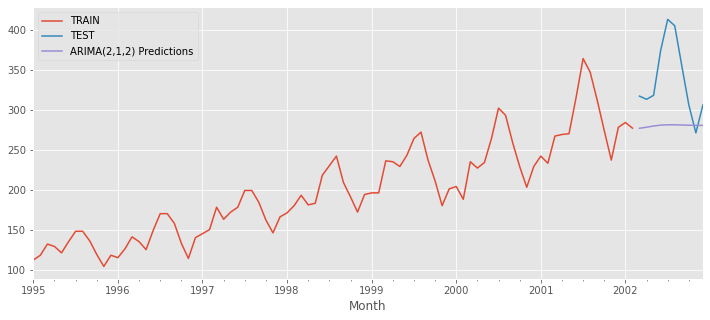

In [24]:
# plot the train,test and forecast data
train['Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test['Passengers'].plot(legend=True, label='TEST', figsize=(12,5))
forecast_212.plot(legend=True, figsize=(12,5));

In [25]:
forecast_212

2002-03-01    276.789580
2002-04-01    278.096728
2002-05-01    279.640623
2002-06-01    280.713590
2002-07-01    281.152689
2002-08-01    281.119550
2002-09-01    280.871134
2002-10-01    280.613007
2002-11-01    280.448027
2002-12-01    280.390516
Freq: MS, Name: ARIMA(2,1,2) Predictions, dtype: float64

In [26]:
from statsmodels.tools.eval_measures import rmse

In [27]:
# caluclate the rmse for the model
rmse_212 = rmse(test['Passengers'], forecast_212)
rmse_212

72.54218835594352

In [28]:
test['Passengers'].mean()

337.8

In [29]:
72.54*100/337.8

21.474245115452934

In [30]:
# implement auto_arima to find the best parameters in the range of 2 to 5 for p & q and d=1
auto_arima_model = auto_arima(train['Passengers'], seasonal = True, 
           trace = True, error_action = 'ignore', suppress_warnings = True,
           start_p=2,
           start_q=2,
           max_p=5, max_q=5, stepwise=False, d=1, max_d=5, 
           start_P=0, D=1, max_P=5, max_D=5,m=12, start_Q=0, max_Q=5)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=549.719, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=546.173, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=547.986, Time=0.11 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=549.202, Time=0.23 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=550.850, Time=0.34 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=546.324, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=548.069, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=547.859, Time=0.07 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(3,1,0)[12]             :

In [31]:
auto_arima_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (1, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [32]:
# import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
# fit a SARIMAX model with the above best parameters & forecast the test data
model = SARIMAX(train['Passengers'], order=(0, 1, 3), seasonal_order=(1, 1, 0, 12))
results = model.fit()
forecast = results.predict(start=len(train), 
                            end=len(train)+len(test)-1).rename('SARIMA Forecast')
forecast

C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2002-03-01    310.769798
2002-04-01    310.660301
2002-05-01    313.221820
2002-06-01    354.658466
2002-07-01    401.045341
2002-08-01    385.945796
2002-09-01    351.183353
2002-10-01    315.083808
2002-11-01    280.696933
2002-12-01    318.133580
Freq: MS, Name: SARIMA Forecast, dtype: float64

In [34]:
df.tail(10)

,Passengers
Month,
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271


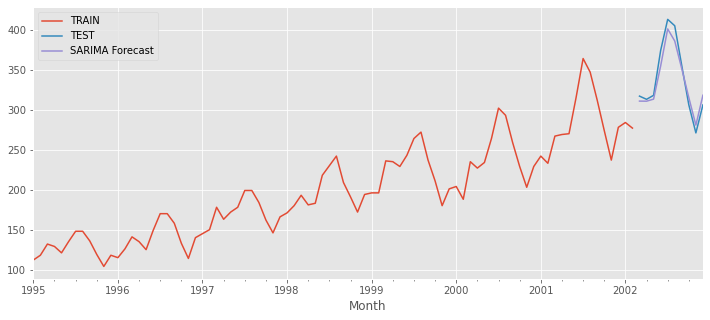

In [35]:
# plot the train, test and forecast data
train['Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test['Passengers'].plot(legend=True, label='TEST', figsize=(12,5))
forecast.plot(legend=True, figsize=(12,5));

In [36]:
# calculate the rmse for the sarimax model
rmse_sarimax = rmse(test['Passengers'], forecast)
rmse_sarimax

11.338116080076464

In [37]:
error=11.33*100/337.8
error

3.354055654233274

#### From the above value of error
#### error=3.35% . is less then 5%,  Because of this model is acceptable 

# Forecasting based on multiple models,like addive ,quadratic,quadratic with additive trend

In [38]:
df=pd.read_csv('Airlines+Data1.csv')
df.head()

,Month,Passengers,Jan,Feb,Mar,apr,may,jun,jul,aug,sep,oct,nov,Dec
0,Jan-95,112,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,0,0,0,0,1,0,0,0,0,0,0,0


In [39]:
df.shape

(96, 14)

In [40]:
# create a daterange object starting from january 1995 forthe next 96 months
date =pd.date_range(start='1995-01-01', periods=96,freq='MS')
date

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [41]:
df['Month']=date
df.head()

,Month,Passengers,Jan,Feb,Mar,apr,may,jun,jul,aug,sep,oct,nov,Dec
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
df=df.set_index('Month')

In [43]:
df.head()

,Passengers,Jan,Feb,Mar,apr,may,jun,jul,aug,sep,oct,nov,Dec
Month,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
t=np.arange(1,97)

In [45]:
df['t']=t

In [46]:
df['t_sq']=df['t']*df['t']

In [47]:
df.head()

,Passengers,Jan,Feb,Mar,apr,may,jun,jul,aug,sep,oct,nov,Dec,t,t_sq
Month,,,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4
1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9
1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16
1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25


In [48]:
log_pass=np.log(df['Passengers'])
df['log_pass']=log_pass

In [49]:
df.head()

,Passengers,Jan,Feb,Mar,apr,may,jun,jul,aug,sep,oct,nov,Dec,t,t_sq,log_pass
Month,,,,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


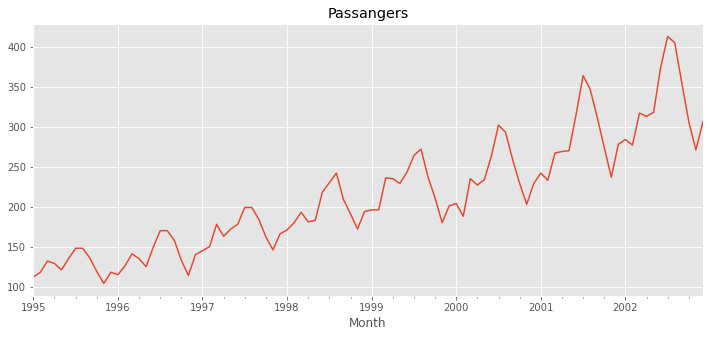

In [50]:
# plot the timeseries
df['Passengers'].plot(figsize=(12, 5), title='Passangers');

In [51]:
# create a pivot table with year as the index and month as the columns and footfalls as the values
df_pivot = df.pivot_table(values='Passengers', index=df.index.year, columns=df.index.month)
df_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


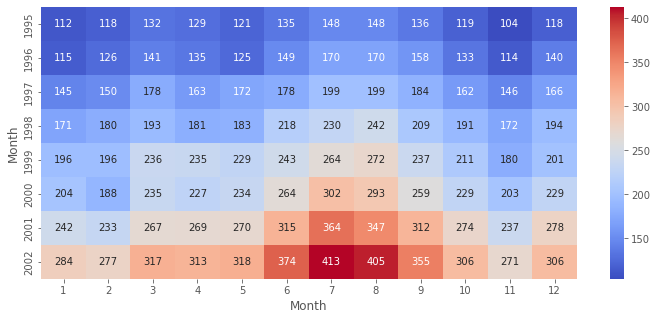

In [52]:
# visualize the pivot table as a heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df_pivot, annot=True,cmap='coolwarm', fmt='g');

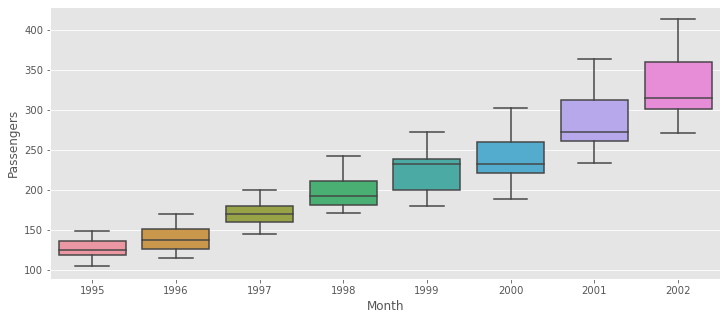

In [53]:
# boxplot of footfalls for every year
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x=df.index.year, y='Passengers');

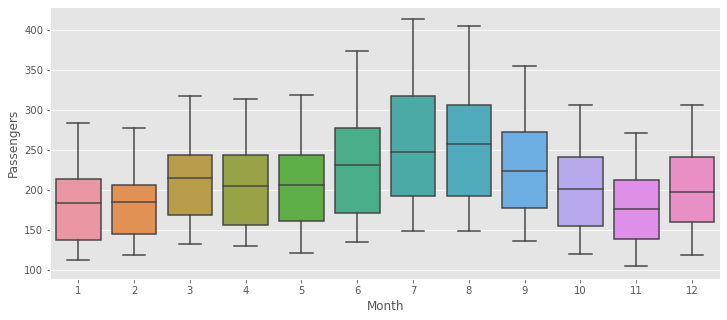

In [54]:
# boxplot of footfalls for every month
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x=df.index.month, y='Passengers');

In [55]:
# split the dataset into train and test with last 12 months in the test dataset
train=df.iloc[:len(df)-12]
test=df.iloc[len(df)-12:]

In [56]:
train.shape ,test.shape

((84, 16), (12, 16))

In [57]:
test.head(12)

,Passengers,Jan,Feb,Mar,apr,may,jun,jul,aug,sep,oct,nov,Dec,t,t_sq,log_pass
Month,,,,,,,,,,,,,,,,
2002-01-01,284,1,0,0,0,0,0,0,0,0,0,0,0,85,7225,5.648974
2002-02-01,277,0,1,0,0,0,0,0,0,0,0,0,0,86,7396,5.624018
2002-03-01,317,0,0,1,0,0,0,0,0,0,0,0,0,87,7569,5.758902
2002-04-01,313,0,0,0,1,0,0,0,0,0,0,0,0,88,7744,5.746203
2002-05-01,318,0,0,0,0,1,0,0,0,0,0,0,0,89,7921,5.762051
2002-06-01,374,0,0,0,0,0,1,0,0,0,0,0,0,90,8100,5.924256
2002-07-01,413,0,0,0,0,0,0,1,0,0,0,0,0,91,8281,6.023448
2002-08-01,405,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
2002-09-01,355,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118


# Forecasting Models

## 1.Linear Regression

In [58]:
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

In [59]:
# fit the linear model on the train dataset with passengers as the target variable and t as the feature
model=ols('Passengers~t',data=train).fit()

In [60]:
# predict the passengers on the test dataset $ compute the RMSE
pred=model.predict(test['t'])
rmse_lin=rmse(test['Passengers'],pred)
print('RMSE of Linear Model:',rmse_lin)

RMSE of Linear Model: 53.19923653480267


In [61]:
rmse_lin*100/np.mean(test['Passengers'])

16.206926590952833

In [62]:
np.mean(test['Passengers'])

328.25

## 2.Exponential Model

In [63]:
# fit the model with log_pass as the target variable and t as the feature variable
model=ols('log_pass~t',data=train).fit()

In [64]:
# predict the passengers on the test dataset & compute the RMSE
pred=model.predict(test['t'])
rmse_log=rmse(test['Passengers'],np.exp(pred))
print('RMSE of Exponential Model:',rmse_log)

RMSE of Exponential Model: 46.05736110315608


In [65]:
rmse_log*100/np.mean(test['Passengers'])

14.031183885196064

## 3.Quadratic Model

In [66]:
# fit the model with passengers as the target and t, t^2 as the feature
model=ols('Passengers~t+I(t**2)',data=train).fit()

In [67]:
# predict the Passengers on the test dataset & compute the rmse
pred=model.predict(test[['t','t_sq']])
rmse_quad=rmse(test['Passengers'],pred)
print('RMSE of Quadratic Model: ', rmse_quad)

RMSE of Quadratic Model:  48.05188897933096


## 4.Additive Seasonality Model

In [68]:
# fit a model with passengers as the target and the months as the features
model = ols('Passengers ~ Jan + Feb + Mar + apr + may + jun + jul + aug + sep + oct + nov + Dec',data=train).fit()

In [69]:
# predict the passengers on the test dataset & compute the RMSE
pred = model.predict(test[['Jan', 'Feb', 'Mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'Dec']])
rmse_additive = rmse(test['Passengers'], pred)
print('RMSE of Additive Model: ', rmse_additive)

RMSE of Additive Model:  132.8197848142182


## 5. Quadratic Model with Additive Seasonality

In [70]:
# fit a model with passengers as the target and the months as the features
model = ols('Passengers ~ Jan + Feb + Mar + apr + may + jun + jul + aug + sep + oct + nov + Dec+t+t_sq',data=train).fit()

In [71]:
# predict the Passengers on the test dataset & compute the RMSE
pred = model.predict(test[['Jan', 'Feb', 'Mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'Dec', 't', 't_sq']])
rmse_quad__with_additive = rmse(test['Passengers'], pred)
print('RMSE of Quadratic with Additive Model: ', rmse_quad__with_additive)

RMSE of Quadratic with Additive Model:  26.360817612102018


In [72]:
rmse_quad__with_additive*100/np.mean(test['Passengers'])

8.030713667053167

## 6. Multiplicative seasonality Model

In [73]:
# fit a model with log_pass as the target with months as the features
model = ols('log_pass ~ Jan + Feb + Mar + apr + may + jun + jul + aug + sep + oct + nov + Dec', data=train).fit()

In [74]:
# predict the passengers on the test dataset & compute the RMSE
pred = model.predict(test[['Jan', 'Feb', 'Mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'Dec']])
rmse_Multi = rmse(test['Passengers'], np.exp(pred))
print('RMSE of Multiplicative seasonality Model: ', rmse_Multi)

RMSE of Multiplicative seasonality Model:  140.06320204708646


## 7. Multiplicative Seasonality with additive trend

In [75]:
# fit the model with log_pass as the target fature where as the month and t  as the feature variable
model=ols('log_pass~Jan+Feb+Mar+apr+may+jun+jul+aug+sep+oct+nov+Dec+t',data=train).fit()

In [76]:
# predict the passengers on the test dataset and compute the Rmse value
pred=model.predict(test[['Jan','Feb','Mar','apr','may','jun','jul','aug','sep','oct','nov','Dec','t']])
rmse_multi_with_additive=rmse(test['Passengers'],np.exp(pred))
print('RMSE of MultiPlitive Model with Additive trend:',rmse_multi_with_additive)

RMSE of MultiPlitive Model with Additive trend: 10.51917254432326


In [77]:
rmse_multi_with_additive*100/np.mean(test['Passengers'])

3.2046222526498886

# Model Comparison

In [78]:
# compare the RMSE of all the models in a dataframe 
rmse_df=pd.DataFrame({'Model':['Linear',
                              'Exponential',
                              'Quadratic',
                              'Additive',
                              'Quadratic Model with Additive Seasonality',
                              'Multiplicative Model',
                              'Multiplicative Model with Additive Trend'],
                     'RMSE':[rmse_lin,
                            rmse_log,
                            rmse_quad,
                            rmse_additive,
                            rmse_quad,
                            rmse_Multi,
                            rmse_multi_with_additive]})
rmse_df

,Model,RMSE
0,Linear,53.199237
1,Exponential,46.057361
2,Quadratic,48.051889
3,Additive,132.819785
4,Quadratic Model with Additive Seasonality,48.051889
5,Multiplicative Model,140.063202
6,Multiplicative Model with Additive Trend,10.519173


In [79]:
# sort the dataframe by RMSE in descending order
rmse_df.sort_values(by='RMSE', ascending=True)

,Model,RMSE
6,Multiplicative Model with Additive Trend,10.519173
1,Exponential,46.057361
2,Quadratic,48.051889
4,Quadratic Model with Additive Seasonality,48.051889
0,Linear,53.199237
3,Additive,132.819785
5,Multiplicative Model,140.063202


 #### From the above Dataframe we select the Multiplicative model with additive trend because it has minimum RMSE value